In [2]:
from aocd import get_data

puzzle_input = get_data(day=10, year=2018).split('\n')

Step 10573: 


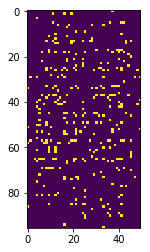

Step 10574: 


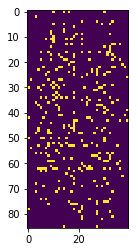

Step 10575: 


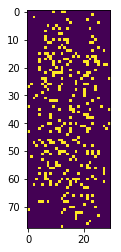

Step 10576: 


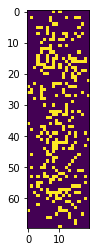

Step 10577: 


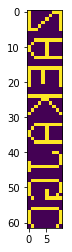

Step 10578: 


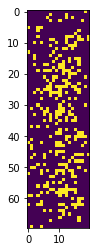

Step 10579: 


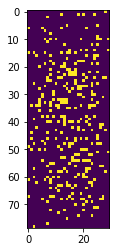

Step 10580: 


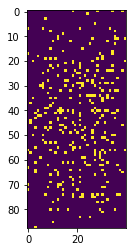

Step 10581: 


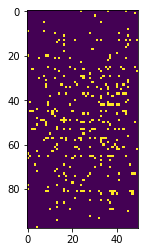

In [368]:
import re
import matplotlib.pyplot as plt
import numpy as np

line_regex = '^position=<[ ]?([-]?\d*), [ ]?([-]?\d*)> velocity=<[ ]?([-]?\d*), [ ]?([-]?\d*)>$'

class Node:
    def __init__(self, line):
        groups = re.match(line_regex, line).groups()
        
        self.position_x = int(groups[0])
        self.position_y = int(groups[1])
        
        self.velocity_x = int(groups[2])
        self.velocity_y = int(groups[3])
        
    def step(self):
        self.position_x += self.velocity_x
        self.position_y += self.velocity_y
    
    
class NodeHandler:
    def __init__(self, puzzle_input):
        self.nodes = [Node(line) for line in puzzle_input]
        self.n_steps = 0
        
    def step_all(self):
        for node in self.nodes:
            node.step()
        self.n_steps += 1
            
    def min_thing(self, is_y=False):
        smallest = float("inf")
        for node in self.nodes:
            if not is_y and node.position_x < smallest:
                smallest = node.position_x
            elif is_y and node.position_y < smallest:
                smallest = node.position_y
        return smallest
    

    def max_thing(self, is_y=False):
        largest = -float("inf")
        for node in self.nodes:
            if not is_y and node.position_x > largest:
                largest = node.position_x
            elif is_y and node.position_y > largest:
                largest = node.position_y
        return largest
    
    def nodes_close(self, limit=100):
        x_offset = self.min_thing()
        y_offset = self.min_thing(is_y=True)
        
        x_lim = self.max_thing()
        y_lim = self.max_thing(is_y=True)
        
        if x_lim - x_offset < limit and y_lim - y_offset < limit:
            return True
        else:
            return False
    
    def print_stuff(self):
        if not self.nodes_close(limit=500):
            return
        
        x_offset = self.min_thing()
        y_offset = self.min_thing(is_y=True)
        
        x_lim = self.max_thing()
        y_lim = self.max_thing(is_y=True)
        
        array = np.zeros((1+x_lim-x_offset, 1+y_lim-y_offset))
                
        for node in self.nodes:
            x_pos = node.position_x - x_offset
            y_pos = node.position_y - y_offset
            
            array[x_pos, y_pos] = 1
         
        plt.imshow(array)
        
nh = NodeHandler(puzzle_input)
while not nh.nodes_close():
    nh.step_all()
while nh.nodes_close():
    nh.print_stuff()
    print('Step {}: '.format(nh.n_steps))
    plt.show()
    nh.step_all()